In [1]:
import numpy as np # numbers
import pandas as pd # dataset
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

In [2]:
df=pd.read_csv("/content/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# prompt: code for missing values

# Check for missing values
print(df.isnull().sum())


# Handling missing values (example strategies)

# 1. Imputation with mean/median/mode
# For numerical features
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


# 2. Imputation with a constant value
# For categorical features
df['Gender'].fillna('Male', inplace=True)  # Or another suitable value
df['Married'].fillna('Yes', inplace=True)  # Or another suitable value
df['Dependents'].fillna('0', inplace=True)  # Or another suitable value
df['Self_Employed'].fillna('No', inplace=True) # Or another suitable value


print(df.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


/tmp/ipython-input-4-658222768.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
/tmp/ipython-input-4-658222768.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [5]:
# prompt: Show the code for encoding

# Encoding categorical features using Label Encoding or One-Hot Encoding

from sklearn.preprocessing import LabelEncoder

# Label Encoding (for ordinal features)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])

# One-Hot Encoding (for nominal features with more than two categories)

# Example using pandas get_dummies
df = pd.get_dummies(df, columns=['Dependents'], prefix='Dependents')


# Display the updated DataFrame
print(df.head())


    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
0  LP001002       1        0          0              0             5849   
1  LP001003       1        1          0              0             4583   
2  LP001005       1        1          0              1             3000   
3  LP001006       1        1          1              0             2583   
4  LP001008       1        0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  Dependents_0  Dependents_1  Dependents_2  \
0              2            1          True         F

In [6]:
# prompt: Drop loanid col

# Drop the 'Loan_ID' column
df = df.drop('Loan_ID', axis=1)

# Display the updated DataFrame
print(df.head())


   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          0              0             5849   
1       1        1          0              0             4583   
2       1        1          0              1             3000   
3       1        1          1              0             2583   
4       1        0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  Dependents_0  Dependents_1  Dependents_2  \
0              2            1          True         False         False   
1              0            0         

In [7]:
# prompt: Build Logistic Regression model

# Split the data into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
model.score(X_train, y_train)

0.8167006109979633

In [9]:
model.score(X_test, y_test)

0.7886178861788617

Confusion Matrix:
[[18 25]
 [ 1 79]]


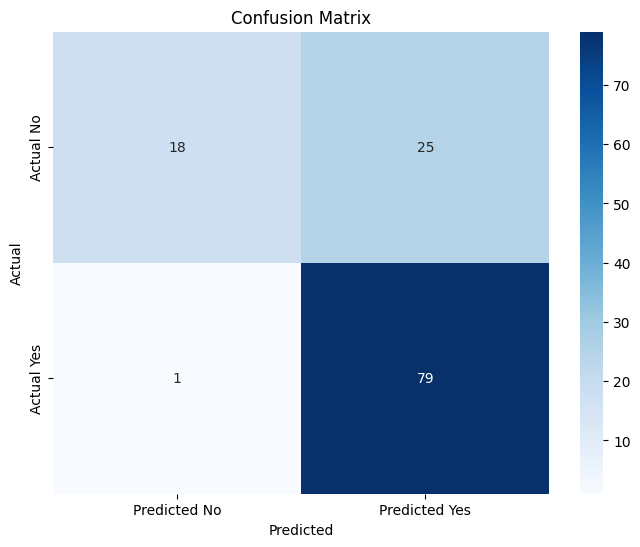

In [10]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()